# Statpearl data

In [3]:
!wget https://ftp.ncbi.nlm.nih.gov/pub/litarch/3d/12/statpearls_NBK430685.tar.gz

--2025-04-04 08:16:44--  https://ftp.ncbi.nlm.nih.gov/pub/litarch/3d/12/statpearls_NBK430685.tar.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1649697732 (1.5G) [application/x-gzip]
Saving to: ‘statpearls_NBK430685.tar.gz’

statpearls_NBK43068 100%[===================>]   1.54G  16.0MB/s    in 91s     

2025-04-04 08:18:16 (17.3 MB/s) - ‘statpearls_NBK430685.tar.gz’ saved [1649697732/1649697732]



In [4]:
!mkdir corpus
!mkdir ./corpus/statpearls

In [5]:
# prompt: unzip the tar file on /content/statpearls_NBK430685.tar.gz
!tar -xvzf /content/statpearls_NBK430685.tar.gz -C /content/corpus/statpearls/

Streaming output truncated to the last 5000 lines.
statpearls_NBK430685/article-19038.nxml
statpearls_NBK430685/Buerger__disease__CTA.jpg
statpearls_NBK430685/orbicularis__oris.jpg
statpearls_NBK430685/procerus.jpg
statpearls_NBK430685/Azygos__Lobe.jpg
statpearls_NBK430685/article-23867.nxml
statpearls_NBK430685/PAINAD__Scale.jpg
statpearls_NBK430685/article-24624.nxml
statpearls_NBK430685/echo_2.jpg
statpearls_NBK430685/article-42970.nxml
statpearls_NBK430685/article-129473.nxml
statpearls_NBK430685/Figure__9.jpg
statpearls_NBK430685/article-25295.nxml
statpearls_NBK430685/article-18410.nxml
statpearls_NBK430685/article-27.nxml
statpearls_NBK430685/article-149630.nxml
statpearls_NBK430685/foramenmag.jpg
statpearls_NBK430685/article-21334.nxml
statpearls_NBK430685/Dyserythropoiesis.jpg
statpearls_NBK430685/ICS_Structure.jpg
statpearls_NBK430685/FORAMEN__LACERUM.jpg
statpearls_NBK430685/Syringomyelia__in__a__patient__with__Hindbrain__herniation.jpg
statpearls_NBK430685/article-36710.nxm

In [6]:
!git clone https://github.com/Besutodesuka/MedRAG.git

Cloning into 'MedRAG'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 140 (delta 42), reused 33 (delta 29), pack-reused 86 (from 1)
Receiving objects: 100% (140/140), 154.78 KiB | 25.80 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [7]:
!python "/content/MedRAG/src/data/statpearls.py"

100% 9561/9561 [00:20<00:00, 456.39it/s]


## result
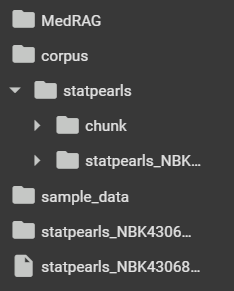

In [8]:
import os
chunks = os.listdir("/content/corpus/statpearls/chunk")

In [9]:
len(chunks)

9559

In [10]:
# prompt: read data inside "/content/corpus/statpearls/chunk" which is collection of jsonl file in pola dataframe

import os
import json
import pandas as pd
from tqdm import tqdm

def read_jsonl_to_dataframe(directory):
  """Reads all JSONL files in a directory into a single pandas DataFrame.

  Args:
    directory: The path to the directory containing the JSONL files.

  Returns:
    A pandas DataFrame containing the data from all JSONL files, or None if an error occurs.
  """
  all_data = []
  for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".jsonl"):
      filepath = os.path.join(directory, filename)
      try:
        with open(filepath, 'r') as f:
          for line in f:
            try:
              data = json.loads(line)
              all_data.append(data)
            except json.JSONDecodeError as e:
              print(f"Error decoding JSON in file {filepath}, line: {line.strip()}: {e}")
      except Exception as e:
        print(f"Error reading file {filepath}: {e}")
  if all_data:
    return pd.DataFrame(all_data)
  else:
    return None

# Example usage:
directory_path = "/content/corpus/statpearls/chunk"
df = read_jsonl_to_dataframe(directory_path)

if df is not None:
  print(f"DataFrame shape: {df.shape}")
  # Now you can work with the DataFrame 'df'
  # For example, display the first few rows:
  print(df.head())
else:
  print(f"No data found in {directory_path}, or all JSONL files were empty.")


100%|██████████| 9559/9559 [00:02<00:00, 3262.63it/s]


DataFrame shape: (334231, 4)
                 id                                              title  \
0  article-140272_0  Primary Intraocular Lymphoma -- Continuing Edu...   
1  article-140272_1  Primary Intraocular Lymphoma -- Continuing Edu...   
2  article-140272_2       Primary Intraocular Lymphoma -- Introduction   
3  article-140272_3       Primary Intraocular Lymphoma -- Introduction   
4  article-140272_4           Primary Intraocular Lymphoma -- Etiology   

                                             content  \
0  Primary intraocular lymphoma is a subset of th...   
1  Objectives: Describe the etiology of primary i...   
2  Primary intraocular lymphoma (PIOL) is a rare ...   
3  Secondary intraocular lymphoma arises outside ...   
4  The etiopathogenesis of primary intraocular ly...   

                                            contents  
0  Primary Intraocular Lymphoma -- Continuing Edu...  
1  Primary Intraocular Lymphoma -- Continuing Edu...  
2  Primary Intraocular L

In [11]:
df

,id,title,content,contents
0,article-140272_0,Primary Intraocular Lymphoma -- Continuing Edu...,Primary intraocular lymphoma is a subset of th...,Primary Intraocular Lymphoma -- Continuing Edu...
1,article-140272_1,Primary Intraocular Lymphoma -- Continuing Edu...,Objectives: Describe the etiology of primary i...,Primary Intraocular Lymphoma -- Continuing Edu...
2,article-140272_2,Primary Intraocular Lymphoma -- Introduction,Primary intraocular lymphoma (PIOL) is a rare ...,Primary Intraocular Lymphoma -- Introduction. ...
3,article-140272_3,Primary Intraocular Lymphoma -- Introduction,Secondary intraocular lymphoma arises outside ...,Primary Intraocular Lymphoma -- Introduction. ...
4,article-140272_4,Primary Intraocular Lymphoma -- Etiology,The etiopathogenesis of primary intraocular ly...,Primary Intraocular Lymphoma -- Etiology. The ...
...,...,...,...,...
334226,article-90497_13,Carpal Tunnel Injection -- Clinical Significance,The symptomatology of patients with CTS often ...,Carpal Tunnel Injection -- Clinical Significan...
334227,article-90497_14,Carpal Tunnel Injection -- Clinical Significance,Tinel’s and Phalen’s tests are in-office maneu...,Carpal Tunnel Injection -- Clinical Significan...
334228,article-90497_15,Carpal Tunnel Injection -- Enhancing Healthcar...,Carpal tunnel syndrome poses a unique challeng...,Carpal Tunnel Injection -- Enhancing Healthcar...
334229,article-90497_16,Carpal Tunnel Injection -- Enhancing Healthcar...,"Usually, a primary care practitioner is the fi...",Carpal Tunnel Injection -- Enhancing Healthcar...


In [12]:
df.to_csv("statpearls.csv")

# Pubmed

# Textbook

# Join data

# Llamaindex sentence base

In [ ]:
# %pip install llama-index-llms-openai
# %pip install llama-index-retrievers-bm25

In [ ]:
# !pip install -q llama_index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.2/129.2 kB 13.1 MB/s eta 0:00:00


In [ ]:
# df

,id,title,content,contents
0,article-23167_0,Polygenic Hypercholesterolemia -- Continuing E...,Polygenic hypercholesterolemia is a common gen...,Polygenic Hypercholesterolemia -- Continuing E...
1,article-23167_1,Polygenic Hypercholesterolemia -- Continuing E...,This activity focuses on assessing and treatin...,Polygenic Hypercholesterolemia -- Continuing E...
2,article-23167_2,Polygenic Hypercholesterolemia -- Continuing E...,Objectives: Differentiate polygenic hyperchole...,Polygenic Hypercholesterolemia -- Continuing E...
3,article-23167_3,Polygenic Hypercholesterolemia -- Introduction,Hypercholesterolemia is caused by genetic muta...,Polygenic Hypercholesterolemia -- Introduction...
4,article-23167_4,Polygenic Hypercholesterolemia -- Etiology,"Polygenic hypercholesterolemia, caused by a co...",Polygenic Hypercholesterolemia -- Etiology. Po...
...,...,...,...,...
334226,article-282_15,Alpha Receptor Agonist Toxicity -- Pearls and ...,Alpha agonist toxicity can be associated with ...,Alpha Receptor Agonist Toxicity -- Pearls and ...
334227,article-282_16,Alpha Receptor Agonist Toxicity -- Enhancing H...,Healthcare workers and nurse practitioners who...,Alpha Receptor Agonist Toxicity -- Enhancing H...
334228,article-282_17,Alpha Receptor Agonist Toxicity -- Enhancing H...,Asymptomatic patients who are at risk for alph...,Alpha Receptor Agonist Toxicity -- Enhancing H...
334229,article-282_18,Alpha Receptor Agonist Toxicity -- Enhancing H...,"The interprofessional team of nurses, pharmaci...",Alpha Receptor Agonist Toxicity -- Enhancing H...


In [ ]:
df["content_len"] = df['content'].apply(lambda x: len(x.split()))

In [ ]:
df.describe()

,content_len
count,334231.000000
mean,75.038437
std,50.105101
min,1.000000
25%,43.000000
50%,68.000000
75%,100.000000
max,10415.000000


In [ ]:
# assume that mostly 3 - 4 sentences is 200 words
df[df["content_len"]<=200]

,id,title,content,contents,content_len
0,article-23167_0,Polygenic Hypercholesterolemia -- Continuing E...,Polygenic hypercholesterolemia is a common gen...,Polygenic Hypercholesterolemia -- Continuing E...,77
1,article-23167_1,Polygenic Hypercholesterolemia -- Continuing E...,This activity focuses on assessing and treatin...,Polygenic Hypercholesterolemia -- Continuing E...,74
2,article-23167_2,Polygenic Hypercholesterolemia -- Continuing E...,Objectives: Differentiate polygenic hyperchole...,Polygenic Hypercholesterolemia -- Continuing E...,67
3,article-23167_3,Polygenic Hypercholesterolemia -- Introduction,Hypercholesterolemia is caused by genetic muta...,Polygenic Hypercholesterolemia -- Introduction...,153
4,article-23167_4,Polygenic Hypercholesterolemia -- Etiology,"Polygenic hypercholesterolemia, caused by a co...",Polygenic Hypercholesterolemia -- Etiology. Po...,102
...,...,...,...,...,...
334226,article-282_15,Alpha Receptor Agonist Toxicity -- Pearls and ...,Alpha agonist toxicity can be associated with ...,Alpha Receptor Agonist Toxicity -- Pearls and ...,95
334227,article-282_16,Alpha Receptor Agonist Toxicity -- Enhancing H...,Healthcare workers and nurse practitioners who...,Alpha Receptor Agonist Toxicity -- Enhancing H...,59
334228,article-282_17,Alpha Receptor Agonist Toxicity -- Enhancing H...,Asymptomatic patients who are at risk for alph...,Alpha Receptor Agonist Toxicity -- Enhancing H...,88
334229,article-282_18,Alpha Receptor Agonist Toxicity -- Enhancing H...,"The interprofessional team of nurses, pharmaci...",Alpha Receptor Agonist Toxicity -- Enhancing H...,54


In [ ]:
df[df["content_len"]>=200].describe()

,content_len
count,5351.000000
mean,248.329471
std,162.796785
min,200.000000
25%,211.000000
50%,228.000000
75%,259.000000
max,10415.000000


In [ ]:
documents = df[df["content_len"]<=200]["content"].values.tolist()

In [ ]:
wochunker

In [ ]:
from llama_index.core import VectorStoreIndex
from llama_index.core.node_parser import SentenceSplitter

splitter = SentenceSplitter(chunk_size=200)

index = VectorStoreIndex.from_documents(documents, transformations=[splitter])

AttributeError: 'str' object has no attribute 'get_doc_id'

In [ ]:

from llama_index.retrievers.bm25 import BM25Retriever

vector_retriever = index.as_retriever(similarity_top_k=2)

bm25_retriever = BM25Retriever.from_defaults(
    docstore=index.docstore, similarity_top_k=2
)

In [ ]:
import numpy as np
import faiss
import torch
from transformers import AutoTokenizer, AutoModel

# -------------------------------
# Step 1: Load the BAAI/bge-m3 model
# -------------------------------
model_name = "BAAI/bge-m3"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def embed_text(text: str, tokenizer, model, device="cpu"):
    """
    Encode a single text into an embedding using mean pooling of the last hidden state.
    """
    # Tokenize the input text.
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    # Perform mean pooling on the last hidden state.
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.cpu().numpy()

def embed_texts(texts: list, tokenizer, model, device="cpu") -> np.ndarray:
    """
    Embed a list of texts.
    """
    all_embeddings = []
    for text in texts:
        emb = embed_text(text, tokenizer, model, device)
        all_embeddings.append(emb)
    # Convert list of arrays to a single 2D numpy array.
    return np.vstack(all_embeddings)

# -------------------------------
# Step 2: Embed your texts
# -------------------------------
texts = [
    "This is the first document.",
    "Here is the second document with more content.",
    "And finally, this is the third document."
]
embeddings = embed_texts(texts, tokenizer, model, device)

# Step 3: Index the embeddings using FAISS with IndexFlatL2
# -------------------------------
# IndexFlatL2 is a brute-force index using Euclidean distance. It computes exact distances between query and all indexed embeddings.
dimension = embeddings.shape[1]  # the dimensionality of the embeddings
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)  # add all embeddings to the index

# Perform a search: for example, find the 2 nearest neighbors for the first text.
k = 2
distances, indices = index.search(embeddings[0:1], k)
print("Nearest neighbor indices:", indices)
print("Distances:", distances)

## Query fusion

In [ ]:
from llama_index.core.retrievers import QueryFusionRetriever

retriever = QueryFusionRetriever(
    [vector_retriever, bm25_retriever],
    similarity_top_k=2,
    num_queries=4,  # set this to 1 to disable query generation
    mode="reciprocal_rerank",
    use_async=True,
    verbose=True,
    # query_gen_prompt="...",  # we could override the query generation prompt here
)

In [ ]:
nodes_with_scores = retriever.retrieve(
    "What happened at Interleafe and Viaweb?"
)

In [ ]:

for node in nodes_with_scores:
    print(f"Score: {node.score:.2f} - {node.text}...\n-----\n")

# from scartch

# New Section

## senteces base overlabs
- specify number of sentence for 1 paragraph then overlapse number

In [11]:
# prompt: write code to count number of sentences in  paragraph

import re

def count_sentences(paragraph):
  """Counts the number of sentences in a given paragraph.

  Args:
    paragraph: The paragraph text as a string.

  Returns:
    The number of sentences in the paragraph.
  """
  # Use regular expressions to split the paragraph into sentences.
  # This handles various sentence boundary markers (., !, ?).
  sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?|\!)\s', paragraph)

  # Return the number of sentences.  Empty strings will be included in the list of split strings,
  # so we'll remove those from the sentence count
  return len([s for s in sentences if s])


# Example usage (assuming 'df' is your DataFrame):
if 'text' in df.columns: #checking for the existence of column in the dataframe
    paragraph = df.iloc[0]['text'] # Assuming the paragraph text is in the 'text' column
    num_sentences = count_sentences(paragraph)
    print(f"Number of sentences: {num_sentences}")
else:
    print("The 'text' column doesn't exist in the DataFrame")


The 'text' column doesn't exist in the DataFrame


In [12]:
import re

def custom_sent_tokenize(text: str) -> list:
    """
    A simple sentence tokenizer that splits text using a regular expression.
    It splits at punctuation (., !, ?) followed by whitespace and an uppercase letter.
    This heuristic avoids splitting at abbreviations (e.g., 'www.').
    """
    # The pattern looks for punctuation followed by whitespace and an uppercase letter.
    pattern = r'(?<=[.!?])\s+(?=[A-Z])'
    sentences = re.split(pattern, text)
    # Remove any extra whitespace.
    return [s.strip() for s in sentences if s.strip()]

def chunk_paragraph(text: str, sentences_per_chunk: int = 3, overlap_sentences: int = 1) -> list:
    """
    Splits the input text into chunks based on sentences.
    This function:
      1. Uses a custom sentence tokenizer to split the text.
      2. Groups adjacent sentences into chunks with a specified number of sentences per chunk.
      3. Creates overlapping chunks by including a number of sentences from the previous chunk at the front.

    Args:
        text (str): The input text.
        sentences_per_chunk (int): Number of sentences in each chunk.
        overlap_sentences (int): Number of sentences to overlap from the previous chunk.

    Returns:
        List[str]: A list of text chunks.
    """
    sentences = custom_sent_tokenize(text)

    chunks = []
    # Calculate the step size: non-overlapping part per chunk.
    step = sentences_per_chunk - overlap_sentences if sentences_per_chunk > overlap_sentences else 1

    for i in range(0, len(sentences), step):
        chunk_sentences = sentences[i:i + sentences_per_chunk]
        if not chunk_sentences:
            break
        # Concatenate sentences to form a chunk.
        chunk = ' '.join(chunk_sentences)
        chunks.append(chunk)
        # If there aren't enough sentences to fill the chunk, we are at the end.
        if len(chunk_sentences) < sentences_per_chunk:
            break

    return chunks

# -------------------------------
# Example usage:
# -------------------------------
if __name__ == "__main__":
    text = (
        "This is the first sentence! Is this the second sentence? Yes, it is. "
        "Visit www.example.com for more info. Now, here is another sentence that is quite informative. "
        "Finally, this is the last sentence."
    )

    # Create chunks with 3 sentences per chunk and 1 sentence overlap.
    chunks = chunk_paragraph(text, sentences_per_chunk=3, overlap_sentences=1)

    for idx, chunk in enumerate(chunks, start=1):
        print(f"Chunk {idx}:\n{chunk}\n")


Chunk 1:
This is the first sentence! Is this the second sentence? Yes, it is.

Chunk 2:
Yes, it is. Visit www.example.com for more info. Now, here is another sentence that is quite informative.

Chunk 3:
Now, here is another sentence that is quite informative. Finally, this is the last sentence.



In [13]:
text = df.iloc[:5].values[:,2].tolist()

In [14]:
# Create chunks with 3 sentences per chunk and 1 sentence overlap.
chunks = chunk_paragraph(text[0], sentences_per_chunk=3, overlap_sentences=1)

for idx, chunk in enumerate(chunks, start=1):
    print(f"Chunk {idx}:\n{chunk}\n{len(chunk )}")

Chunk 1:
Primary intraocular lymphoma is a subset of the primary central nervous system lymphoma characterized by monoclonal proliferation of lymphocytes. It is a very rare ocular neoplasm with high morbidity and mortality. This activity describes the signs useful in the evaluation and treatment of primary intraocular lymphoma.
320
Chunk 2:
This activity describes the signs useful in the evaluation and treatment of primary intraocular lymphoma. It highlights the role of the interprofessional team in evaluating and treating patients with this condition.
215


In [15]:
from tqdm import tqdm

In [16]:
chunks,cn, chunk_lenght,id = [], [], [], []
for i,text in tqdm(df.iterrows()):
  chunk = chunk_paragraph(text.content, sentences_per_chunk=3, overlap_sentences=1)
  chunks.extend(chunk)
  cn.append(len(chunk))
  id.extend([f"{text.id}#{i}" for i in range(len(chunk))])
  chunk_lenght.extend([len(i) for i in chunk])

334231it [00:25, 12896.00it/s]


In [17]:
df_chunked = pd.DataFrame({"id":id, "text": chunks, "len": chunk_lenght})

In [18]:
len(df_chunked)

667604

In [21]:
df_chunked.describe()

,len
count,667604.000000
mean,327.297161
std,193.135950
min,1.000000
25%,198.000000
50%,311.000000
75%,427.000000
max,34589.000000


In [19]:
df_chunked.to_csv("")

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
# prompt:  prompt: do boxplot on df_chunked on len columns compare to content_len column in df

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(y=df_chunked["len"], name='Chunk Lengths'))
fig.add_trace(go.Box(y=df["content_len"], name='Content Lengths')) # Add content_len box plot
fig.update_layout(title=f'Box Plot of Chunk Lengths vs Content Lengths',
                  yaxis_title="Length")
fig.show()


In [ ]:
import numpy as np
import faiss
import torch
from transformers import AutoTokenizer, AutoModel

# -------------------------------
# Step 1: Load the BAAI/bge-m3 model
# -------------------------------
model_name = "BAAI/bge-m3"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

def embed_text(text: str, tokenizer, model, device="cpu"):
    """
    Encode a single text into an embedding using mean pooling of the last hidden state.
    """
    # Tokenize the input text.
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    # Perform mean pooling on the last hidden state.
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.cpu().numpy()

def embed_texts(texts: list, tokenizer, model, device="cpu") -> np.ndarray:
    """
    Embed a list of texts.
    """
    all_embeddings = []
    for text in texts:
        emb = embed_text(text, tokenizer, model, device)
        all_embeddings.append(emb)
    # Convert list of arrays to a single 2D numpy array.
    return np.vstack(all_embeddings)

# -------------------------------
# Step 2: Embed your texts
# -------------------------------
texts = [
    "This is the first document.",
    "Here is the second document with more content.",
    "And finally, this is the third document."
]
embeddings = embed_texts(texts, tokenizer, model, device)

# Step 3: Index the embeddings using FAISS with IndexFlatL2
# -------------------------------
# IndexFlatL2 is a brute-force index using Euclidean distance. It computes exact distances between query and all indexed embeddings.
dimension = embeddings.shape[1]  # the dimensionality of the embeddings
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)  # add all embeddings to the index

# Perform a search: for example, find the 2 nearest neighbors for the first text.
k = 2
distances, indices = index.search(embeddings[0:1], k)
print("Nearest neighbor indices:", indices)
print("Distances:", distances)


In [ ]:
# -------------------------------
# Step 2: Embed your texts
# -------------------------------
texts = [
    "This is the first document.",
    "Here is the second document with more content.",
    "And finally, this is the third document."
]
embeddings = embed_texts(texts, tokenizer, model, device)

In [ ]:
# Step 3: Index the embeddings using FAISS with IndexFlatL2
# -------------------------------
# IndexFlatL2 is a brute-force index using Euclidean distance. It computes exact distances between query and all indexed embeddings.
dimension = embeddings.shape[1]  # the dimensionality of the embeddings
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)  # add all embeddings to the index

# Perform a search: for example, find the 2 nearest neighbors for the first text.
k = 2
distances, indices = index.search(embeddings[0:1], k)
print("Nearest neighbor indices:", indices)
print("Distances:", distances)


In [ ]:
# We are using the IndexFlatL2 algorithm for the following reasons:
#
# 1. **Exact Search:** IndexFlatL2 performs a brute-force search, meaning it computes the exact L2 (Euclidean) distance
#    between the query embedding and every other embedding. This guarantees accurate nearest neighbor results.
#
# 2. **Simplicity:** This index is simple to implement and works out-of-the-box with FAISS, making it ideal for
#    prototyping or scenarios with a moderate number of texts.
#
# 3. **Scalability Consideration:** For very large datasets, more sophisticated FAISS indexes (such as IVF or HNSW)
#    can be used for approximate nearest neighbor search to improve speed and reduce memory usage, but they trade off
#    some accuracy. For smaller datasets or when exact results are critical, IndexFlatL2 is a solid choice.

## sentence version 2

In [13]:
!pip install -q faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 71.9 MB/s eta 0:00:00


In [14]:
!pip install faiss-cpu
!pip install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0

In [29]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import nltk
import numpy as np
import torch
import faiss

In [16]:
# Download required NLTK tokenizer data
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
from transformers import AutoConfig, AutoModel
from sentence_transformers import SentenceTransformer
from FlagEmbedding import BGEM3FlagModel

class Chunker:
  def __init__(self, max_words=100, overlap_words=20, embed_model = "", batch_size=32) -> None:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"loading model to {device} device")
    try:
      self.model = SentenceTransformer(embed_model, device=device, cache_folder="..\model\bge_dpr")
    except:
       # Load existing config and add the model_type
       self.model = BGEM3FlagModel('BAAI/bge-m3', use_fp16=True)
    self.max_words = max_words
    self.overlap_words = overlap_words
    self.batch_size = batch_size
    self.all_chunks = None
    self.metadata = None
    self.embedding = None

  def chunk_text(self, text):
      """
      Splits a text into overlapping chunks.

      - Tokenizes the text into sentences.
      - Combines sentences until the chunk reaches max_words.
      - Overlaps the last `overlap_words` from the previous chunk with the next chunk.
      """
      sentences = nltk.sent_tokenize(text)
      chunks = []
      current_chunk = []
      current_word_count = 0

      for sentence in sentences:
          sentence_words = sentence.split()
          sentence_word_count = len(sentence_words)

          # If adding this sentence stays under the max_words threshold, add it.
          if current_word_count + sentence_word_count <= self.max_words:
              current_chunk.append(sentence)
              current_word_count += sentence_word_count
          else:
              # Finalize the current chunk.
              chunk_text = " ".join(current_chunk)
              chunks.append(chunk_text)

              # Create overlap: take last overlap_words from current_chunk.
              all_words = chunk_text.split()
              overlap = all_words[-self.overlap_words:] if len(all_words) >= self.overlap_words else all_words
              # Start a new chunk with the overlap + current sentence.
              current_chunk = [" ".join(overlap), sentence]
              current_word_count = len(overlap) + sentence_word_count

      # Append any remaining text as a chunk.
      if current_chunk:
          chunks.append(" ".join(current_chunk))
      return chunks

  def set_batch_size(self, batch_size):
    self.batch_size = batch_size

  def chunk(self, texts, dataset= ""):
    # Step 1: Chunking with progress tracking
    if self.all_chunks == None:
      all_chunks = []
      metadata = []  # to keep track of which text and chunk this came from
      for i, text in enumerate(tqdm(texts, desc="Chunking texts")):
          chunks = self.chunk_text(text)
          for j, chunk in enumerate(chunks):
              all_chunks.append(chunk)
              metadata.append({"dataset":dataset,"text_index": f"{i}#{j}", "chunk": chunk})

      self.all_chunks = all_chunks
      self.metadata = metadata
    return self.all_chunks, self.metadata

  def pipeline(self, texts,  is_chunked = False):
      """
      Full pipeline:
        1. Chunking texts with overlapping boundaries.
        2. Getting embeddings from a Hugging Face model.
        3. Indexing embeddings using FAISS.

      Args:
        texts (List[str]): List of raw text documents.
        max_words (int): Maximum words per chunk.
        overlap_words (int): Number of overlapping words between chunks.
        model_name (str): Hugging Face model to use for embeddings.

      Returns:
        index (faiss.Index): FAISS index populated with embeddings.
        chunk_metadata (List[dict]): Metadata mapping each index entry to its original chunk and source text index.
      """
      # if allchunk is not define and it is not chunked then chunk
      if self.all_chunks is None and not is_chunked:
        self.chunk(texts)
      else:
        # if input ar chunked then assign text as chunk
        self.all_chunks = texts

      try:
        self.embedding = self.model.encode(
              self.all_chunks,
              batch_size=self.batch_size,
              convert_to_numpy=True,
              show_progress_bar=True
        )
      except:
        self.embedding = self.model.encode(
              self.all_chunks,
              batch_size=self.batch_size,
        )['dense_vecs']
      # Step 3: Create a FAISS index
      dimension = self.embedding.shape[1]
      index = faiss.IndexFlatL2(dimension)
      index.add(self.embedding)

      return index, self.metadata

In [26]:
indexer = Chunker(embed_model="BAAI/bge-m3", max_words=200, overlap_words=50, batch_size= 32)

loading model to cuda device


In [27]:
indexer.set_batch_size(32)

In [30]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)

NameError: name 'embeddings' is not defined

In [28]:
index, metadata = indexer.pipeline(df["contents"], is_chunked= True)

Batches:   0%|          | 0/10445 [00:00<?, ?it/s]

NameError: name 'faiss' is not defined

In [ ]:
# Functions for saving and loading the FAISS index and metadata.
def save_index(index, metadata, index_path="faiss_index.bin", metadata_path="metadata.pkl"):
    """
    Saves the FAISS index and metadata to disk.

    Args:
        index (faiss.Index): The FAISS index to save.
        metadata (list): List of metadata dictionaries corresponding to the indexed chunks.
        index_path (str): File path to save the FAISS index.
        metadata_path (str): File path to save the metadata.
    """
    # Save FAISS index to a binary file
    faiss.write_index(index, index_path)
    print(f"FAISS index saved to {index_path}")

    # Save metadata using pickle
    with open(metadata_path, "wb") as f:
        pickle.dump(metadata, f)
    print(f"Metadata saved to {metadata_path}")

def load_index(index_path="faiss_index.bin", metadata_path="metadata.pkl"):
    """
    Loads the FAISS index and metadata from disk.

    Args:
        index_path (str): File path to load the FAISS index from.
        metadata_path (str): File path to load the metadata from.

    Returns:
        index (faiss.Index): The loaded FAISS index.
        metadata (list): The loaded metadata.
    """
    # Load FAISS index from the binary file
    index = faiss.read_index(index_path)
    print(f"FAISS index loaded from {index_path}")

    # Load metadata using pickle
    with open(metadata_path, "rb") as f:
        metadata = pickle.load(f)
    print(f"Metadata loaded from {metadata_path}")

    return index, metadata

# Example usage:
if __name__ == "__main__":
    print("FAISS index built with {} vectors.".format(index.ntotal))

    # Save the index and metadata
    save_index(index, metadata, "SP_index.bin", "SP_metadata.pkl")

    # Load the index and metadata
    loaded_index, loaded_metadata = load_index("SP_index.bin", "SP_metadata.pkl")

    print("Loaded index contains {} vectors.".format(loaded_index.ntotal))
    print("Loaded metadata:")
    for info in loaded_metadata:
        print(info)

In [ ]:
!mv SP_index.bin ./index1
!mv SP_metadata.pkl ./index1

In [ ]:
!zip ./index1 index1.zip